In [4]:
%load_ext autoreload
%autoreload 2
import os
os.chdir("/projects/cft_vlm/finetune")

In [ ]:
import matplotlib.pyplot as plt
import json
import re
from qwenvl.eval import comp_answer_basic, yes_no_filter
import numpy as np


def draw_conf_mat(output_file):
  with open(output_file, "r") as f:
    items = [json.loads(line) for line in f]

  conf_mat = {
      "yes": {"yes": 0, "no": 0},
      "no": {"yes": 0, "no": 0}
  }
  invalid = 0
  total = 0
  for item in items:
    total += 1
    if item['answer'] not in ["yes", "no"]:
      continue
    model_answer = item.get('model_answer', '')
    model_answer = re.split(r'[^\w]+', model_answer.strip())
    model_answer = model_answer[0].lower()
    if model_answer in conf_mat:
      conf_mat[item['answer']][model_answer] += 1
    else:
      invalid += 1


  labels = ["yes", "no"]
  cm = np.array([[conf_mat["yes"]["yes"], conf_mat["yes"]["no"]],
                [conf_mat["no"]["yes"], conf_mat["no"]["no"]]])

  fig, ax = plt.subplots()
  im = ax.imshow(cm, cmap="Blues")

  # Show all ticks and label them
  ax.set_xticks(np.arange(len(labels)), labels=labels)
  ax.set_yticks(np.arange(len(labels)), labels=labels)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_title("Confusion Matrix")

  # Loop over data dimensions and create text annotations.
  for i in range(len(labels)):
    for j in range(len(labels)):
      ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

  total_yes = conf_mat["yes"]["yes"] + conf_mat["yes"]["no"]
  total_no = conf_mat["no"]["yes"] + conf_mat["no"]["no"]
  print("Total actual yes: ", total_no)
  print("Total actual no: ", total_yes)
  print("TP rate: ", conf_mat["yes"]["yes"] / total_yes if total_yes > 0 else 0)
  print("TN rate: ", conf_mat["no"]["no"] / total_no if total_no > 0 else 0)
  print("Accuracy: ", (conf_mat["yes"]["yes"] + conf_mat["no"]["no"]) / total if total > 0 else 0)
  print("Total invalid answers: ", invalid)
  plt.show()

In [ ]:
output_file = "/fs01/projects/cft_vlm/datasets/vqa_rad/results/train/Qwen2.5-VL-3B-Instruct-open-pmc-tiny/results.jsonl"

draw_conf_mat(output_file)

In [ ]:
output_file = "/fs01/projects/cft_vlm/datasets/vqa_rad/results/train/Qwen2.5-VL-3B-Instruct-openbiomedvid/results.jsonl"
draw_conf_mat(output_file)

In [ ]:
output_file = "/fs01/projects/cft_vlm/datasets/vqa_rad/results/train/Qwen2.5-VL-3B-Instruct-open-pmc-small/results.jsonl"
draw_conf_mat(output_file)

Total actual yes:  1535
Total actual no:  1808
TP rate:  0.7870575221238938
TN rate:  0.38697068403908796
Accuracy:  0.30032757593805837
Total invalid answers:  18


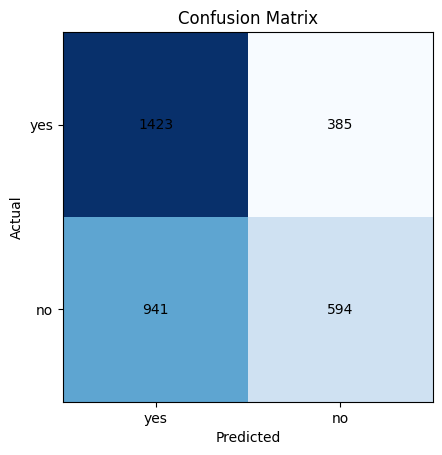

In [10]:
output_file = "/fs01/projects/cft_vlm/datasets/path_vqa/results/test/Qwen2.5-VL-3B-Instruct/results.jsonl"
draw_conf_mat(output_file)

Total actual yes:  916
Total actual no:  1344
TP rate:  0.8541666666666666
TN rate:  0.2445414847161572
Accuracy:  0.20428826682549137
Total invalid answers:  1101


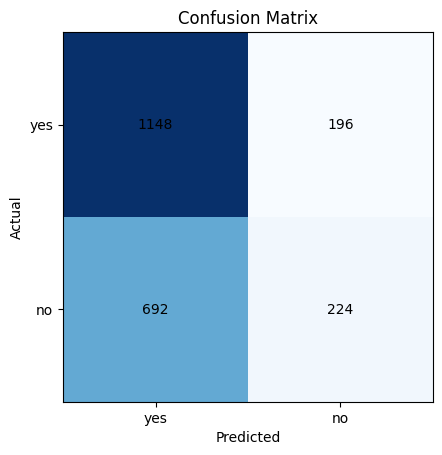

In [11]:
output_file = "/fs01/projects/cft_vlm/datasets/path_vqa/results/test/Qwen2.5-VL-3B-Instruct-openbiomedvid/results.jsonl"
draw_conf_mat(output_file)

Total actual yes:  1491
Total actual no:  1769
TP rate:  0.6257772752967778
TN rate:  0.47149564050972503
Accuracy:  0.2695056581298392
Total invalid answers:  101


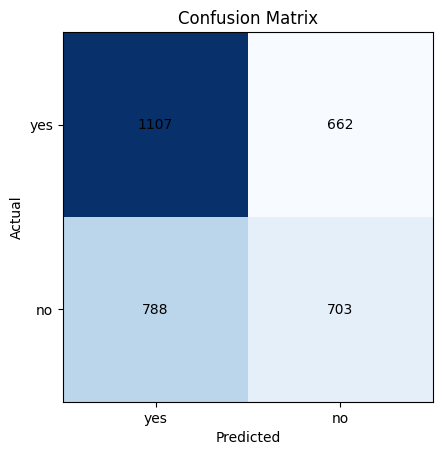

In [8]:
output_file = "/fs01/projects/cft_vlm/datasets/path_vqa/results/test/Qwen2.5-VL-3B-Instruct-open-pmc-tiny/results.jsonl"
draw_conf_mat(output_file)

Total actual yes:  1495
Total actual no:  1761
TP rate:  0.7047132311186826
TN rate:  0.30234113712374583
Accuracy:  0.25208457415128055
Total invalid answers:  105


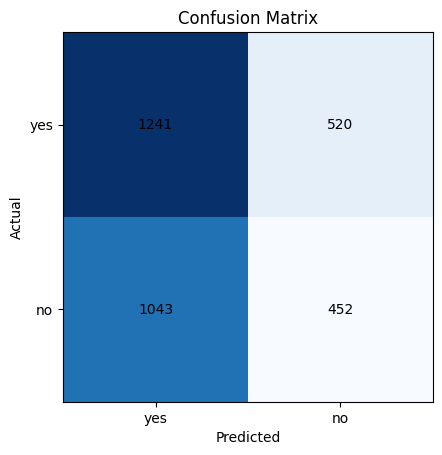

In [9]:
output_file = "/fs01/projects/cft_vlm/datasets/path_vqa/results/test/Qwen2.5-VL-3B-Instruct-open-pmc-small/results.jsonl"
draw_conf_mat(output_file)